# 1. load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, 2:]
    y = data.iloc[:, 1]
    return X, y


X, y = load_data('./output.csv')
# load_data('../Feature Selection/output_after_feature_selection.csv')

FileNotFoundError: [Errno 2] No such file or directory: './output.csv'

In [2]:
X

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58.5,1,0,1,0,3,2,1,1,4,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,34.3,0,0,0,1,3,3,1,0,2,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,53.3,0,0,0,1,2,1,1,0,2,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,68.8,1,0,0,0,3,3,1,1,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [3]:
y

0      144.000000
1      142.000000
2      135.000000
3       12.000000
4      109.000000
          ...    
395     54.500000
396     49.250000
397     48.500000
398     47.500000
399     46.916667
Name: RelapseFreeSurvival (outcome), Length: 400, dtype: float64

In [4]:
# test feature selection
from sklearn.ensemble import RandomForestRegressor


def feature_selection(X, y, count):
    # Train a Random Forest model
    model = RandomForestRegressor()
    model.fit(X, y)

    # Get feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print(feature_importance)

    # Select features with importance above a threshold
    selected_features = feature_importance[:count]["Feature"]
    print("Selected Features:", selected_features)
    X = X[selected_features]
    return X


X = feature_selection(X, y, 30)

                              Feature  Importance
30       original_firstorder_Kurtosis    0.044848
36          original_firstorder_Range    0.035832
0                                 Age    0.028993
26   original_firstorder_90Percentile    0.028571
110        original_glszm_ZoneEntropy    0.028305
..                                ...         ...
66           original_glcm_SumSquares    0.000919
60          original_glcm_JointEnergy    0.000910
61         original_glcm_JointEntropy    0.000853
53                  original_glcm_Idm    0.000685
47             original_glcm_Contrast    0.000651

[118 rows x 2 columns]
Selected Features: 30                          original_firstorder_Kurtosis
36                             original_firstorder_Range
0                                                    Age
26                      original_firstorder_90Percentile
110                           original_glszm_ZoneEntropy
105                 original_glszm_SizeZoneNonUniformity
39             

In [5]:
def zscoree(X,y_reg):
        


    # 假设 X 是特征，y_reg 是目标变量

    # 计算 Z-Score
    z_scores = zscore(X)

    # 计算所有特征的 Z-Score的绝对值
    z_scores_flat = np.abs(z_scores)

    # 绘制 Z-Score 分布图
    plt.figure(figsize=(10, 6))
    sns.histplot(z_scores_flat, bins=30, kde=True)
    plt.title("Distribution of Z-Scores")
    plt.xlabel("Z-Score")
    plt.ylabel("Frequency")
    plt.axvline(x=3, color='r', linestyle='--', label="Outlier threshold = 3")
    plt.legend()
    plt.show()

    # 设置 Z-Score 阈值
    threshold = 3

    # 找到所有 Z-Score 超过阈值的样本（每个特征的 Z-Score 超过阈值的样本）
    outliers = (np.abs(z_scores) > threshold).any(axis=1) # 检查任意一个特征的 Z-Score 是否超出阈值

    # 删除异常值
    X = X[~outliers]
    y_reg = y_reg[~outliers]

    # 输出去除的异常值个数
    print(f"Removed {np.sum(outliers)} outliers from the data.")
    print(X.shape, y_reg.shape)
    return X, y_reg
    

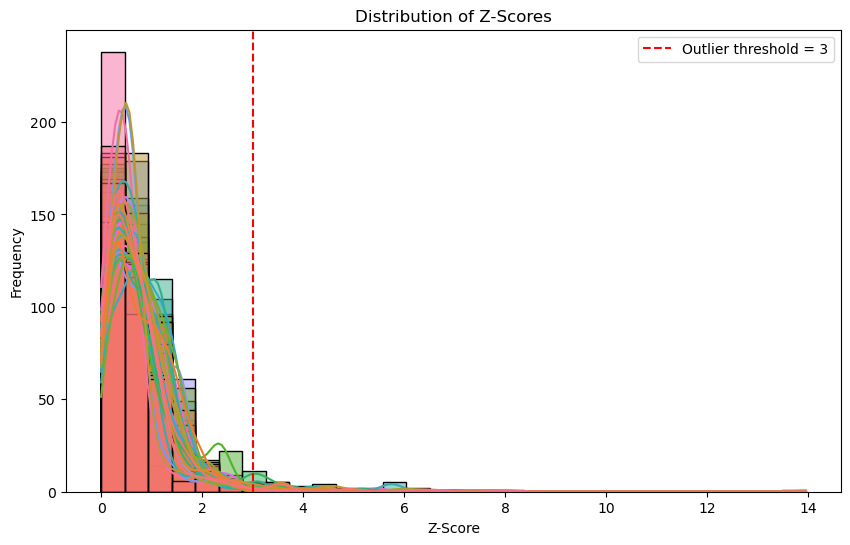

Removed 62 outliers from the data.
(338, 30) (338,)


In [6]:
X, y =zscoree(X,y)

In [7]:
def split_data_into_test_and_train(X, y):
    np.random.seed(42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = split_data_into_test_and_train(X, y)

# 2. Linear Reg

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def linear_reg(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)

    print("Model Coefficients:", model.coef_)
    print("Model Intercept:", model.intercept_)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)
    return model


model = linear_reg(X_train, X_test, y_train, y_test)

Mean Squared Error (MSE): 689.220477968231
R-squared (R2): 0.056375322437278386
Model Coefficients: [ 1.58476522e+01  2.78687879e+09 -1.08122826e-01  1.41429085e+01
 -3.16254683e+00  1.58495695e+00  7.17451512e+00  4.71625609e+01
 -5.37902434e+01  7.15522774e+01  7.96512905e-01  4.53676323e+01
 -2.78687880e+09  3.12655799e+03 -3.33878010e+02 -1.71425146e+00
 -3.24184678e+01  2.78687880e+09 -3.48565121e+01  1.54693585e+02
  1.01579967e+00 -2.80929461e-01 -1.79354172e+03 -3.31924140e-01
 -1.55038966e+02 -9.85900488e+01  1.35609968e+02 -1.31106015e+01
 -4.27668583e+00  7.75146484e-03]
Model Intercept: 129.8187703827281
Mean Absolute Error (MAE): 21.11615948355846


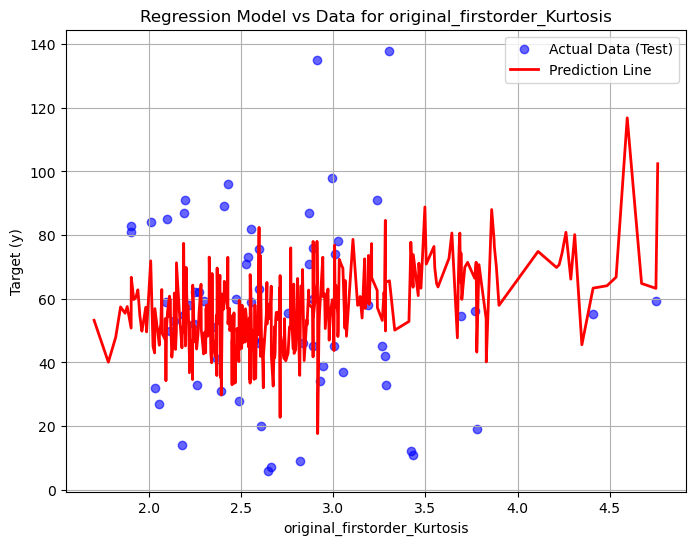

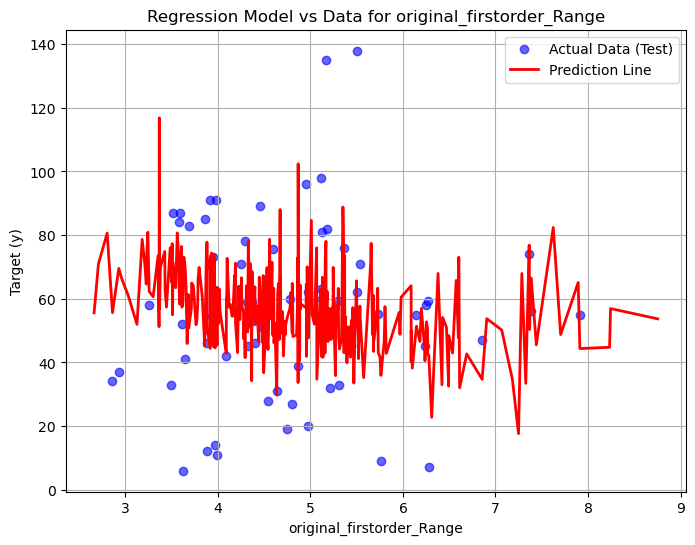

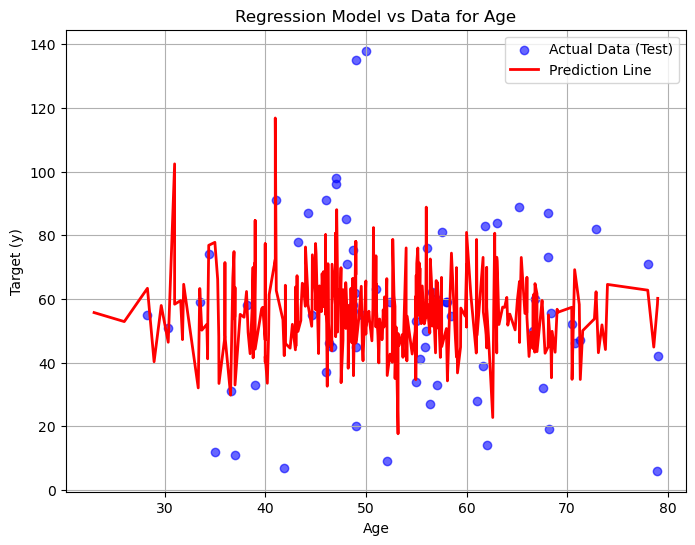

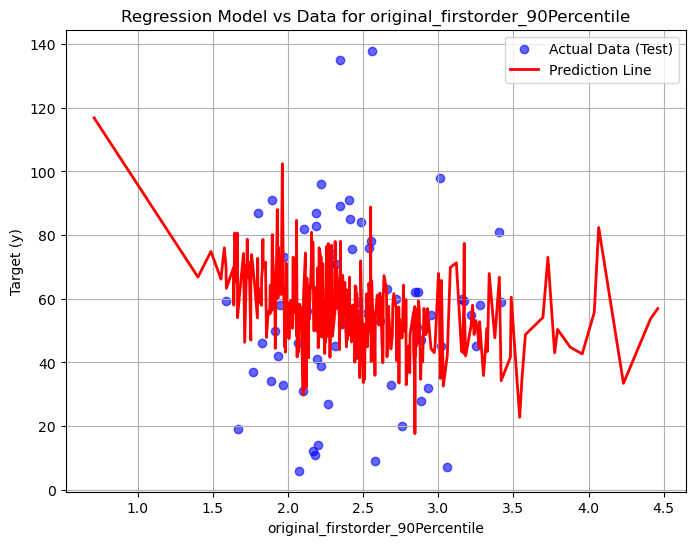

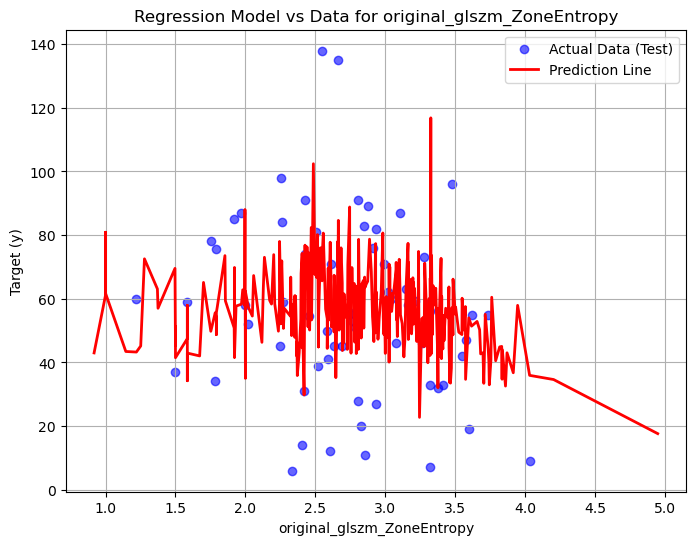

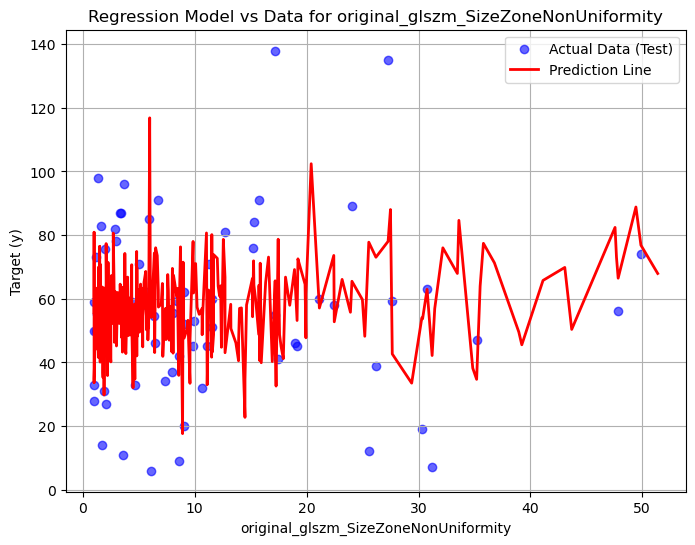

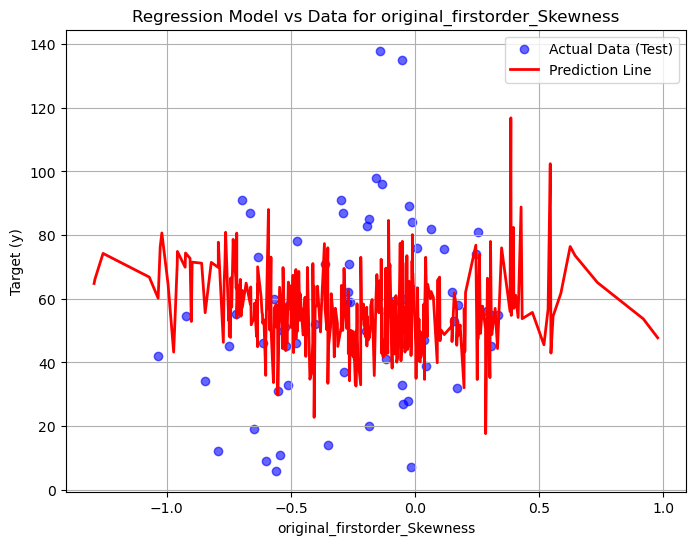

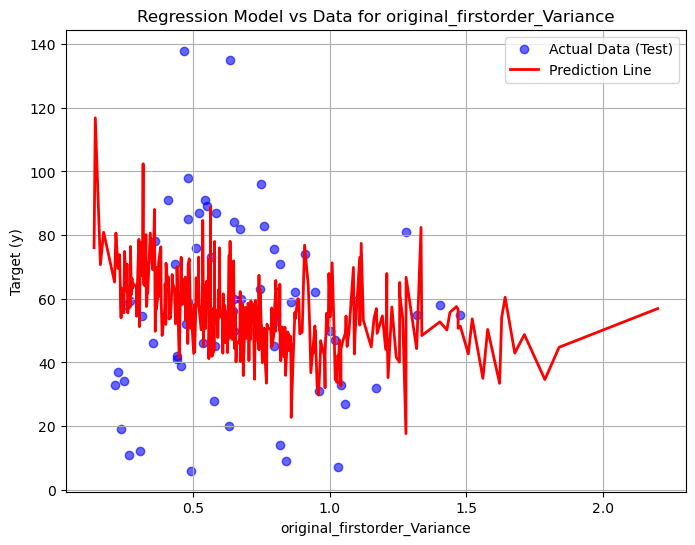

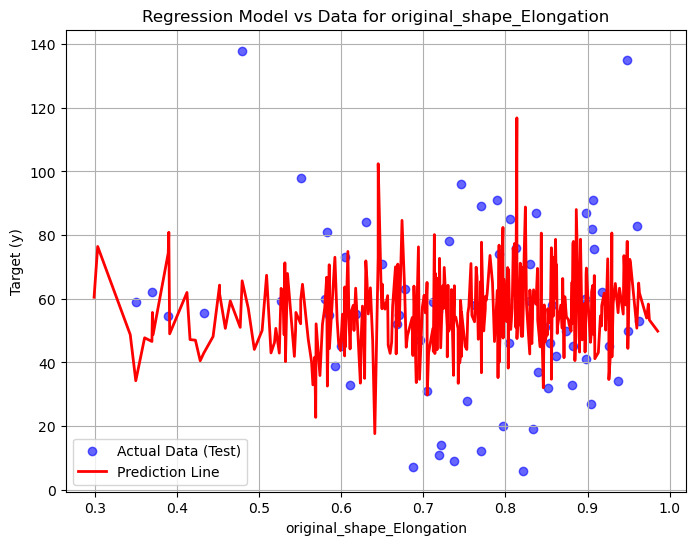

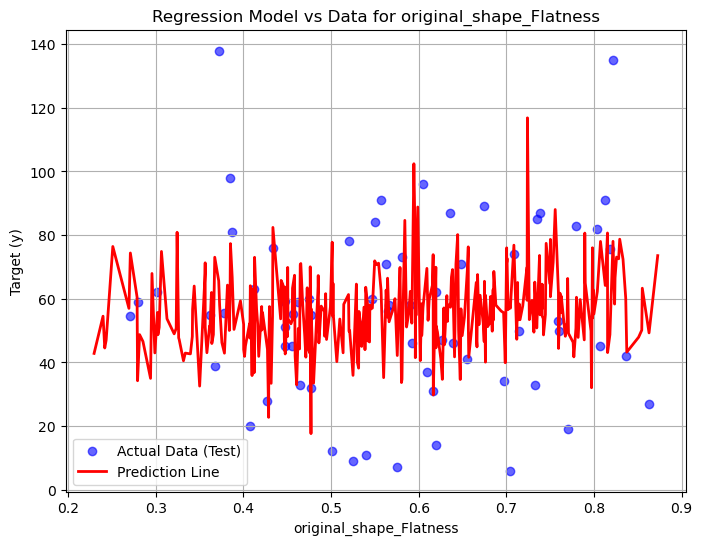

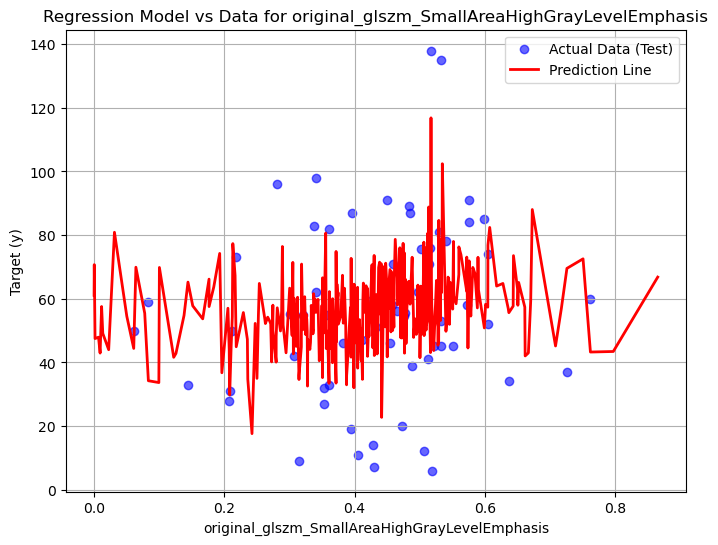

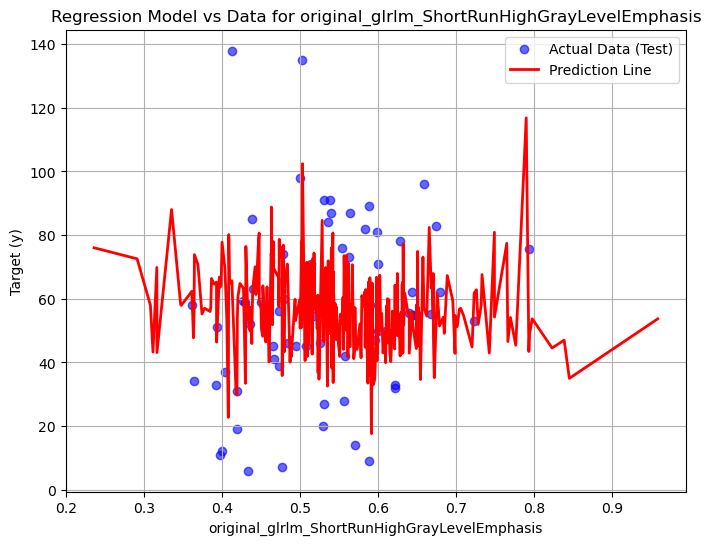

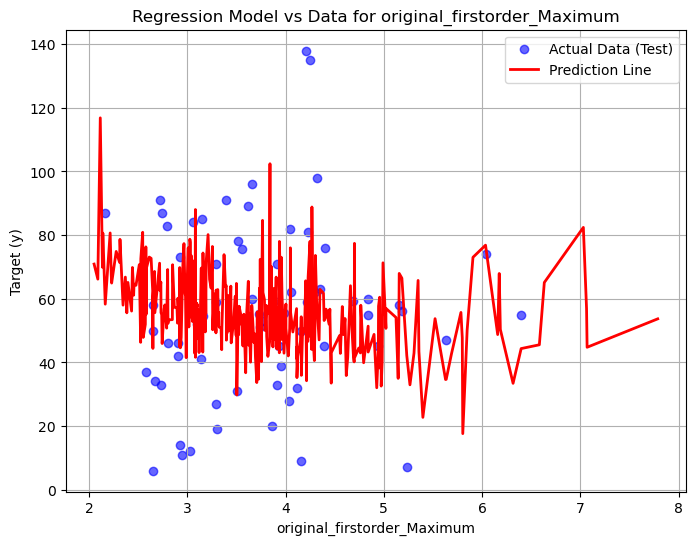

In [ ]:
# import matplotlib.pyplot as plt
#
# # Ensure X is in DataFrame format for column access (if not already)
# X_test = pd.DataFrame(X_test, columns=X.columns)
#
# # Generate predictions for the full range of X values for visualization
# X_full_range = pd.concat([X_train, X_test])  # Combine training and testing data
# y_full_pred = model.predict(X_full_range)
#
# # Visualization: Plot for each feature
# for feature in X.columns:
#     plt.figure(figsize=(8, 6))
#
#     # Scatter plot of actual data (testing points)
#     plt.scatter(X_test[feature], y_test, color='blue', label='Actual Data (Test)', alpha=0.6)
#
#     # Line plot of predictions (model's regression line)
#     sorted_indices = X_full_range[feature].argsort()
#     plt.plot(
#         X_full_range[feature].iloc[sorted_indices],
#         y_full_pred[sorted_indices],
#         color='red',
#         label='Prediction Line',
#         linewidth=2
#     )
#
#     # Formatting the plot
#     plt.title(f"Regression Model vs Data for {feature}")
#     plt.xlabel(feature)
#     plt.ylabel("Target (y)")
#     plt.legend()
#     plt.grid()
#     plt.show()

# 3. SVM

## 3.1 rbf kernal

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model_rbf = SVR(kernel='rbf', C=10.0, epsilon=0.1, gamma='scale')
model_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = model_rbf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_rbf)
r2 = r2_score(y_test, y_pred_rbf)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 716.3411472099189
R-squared: 0.04551039314840433


## 3.2 linear kernel

In [ ]:
model_linear = SVR(kernel='linear', C=10.0, epsilon=0.1, gamma='scale')
model_linear.fit(X_train_scaled, y_train)

y_pred_linear = model_linear.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 748.021279170177
R-squared: 0.003298163936765408


## 3.3 Polynomial kernel

In [ ]:
model_poly = SVR(kernel='poly', C=10.0, epsilon=0.1, gamma='scale')
model_poly.fit(X_train_scaled, y_train)

y_pred_poly = model_poly.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 796.4860142749554
R-squared: -0.0612787295398991


## 3.4 Sigmoid kernel

In [ ]:
model_sigmoid = SVR(kernel='sigmoid', C=10.0, epsilon=0.1, gamma='scale')
model_sigmoid.fit(X_train_scaled, y_train)

y_pred_sigmoid = model_sigmoid.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_sigmoid)
r2 = r2_score(y_test, y_pred_sigmoid)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 859.1835905582618
R-squared: -0.1448201890390337


## 3.5 Trying to tune the hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernels to try
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],  # Epsilon in the epsilon-SVR model
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf', 'poly', 'sigmoid')
}

# Grid search
grid_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R-squared
    verbose=1,  # Show progress
    n_jobs=-1  # Use all available processors
)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters and their performance
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R2 Score:", grid_search.best_score_)

# Evaluate on the test set
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Mean Squared Error (MSE):", mse)
print("Test R-squared (R2):", r2)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'C': 1, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation R2 Score: -0.03281374287532972
Test Mean Squared Error (MSE): 734.859168554488
Test R-squared (R2): 0.020836033757364536


# Random Forest

# MLP

# CNN

# trying different feature selected
different feature selected, and see the mse and r2